<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/hierarchical_cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


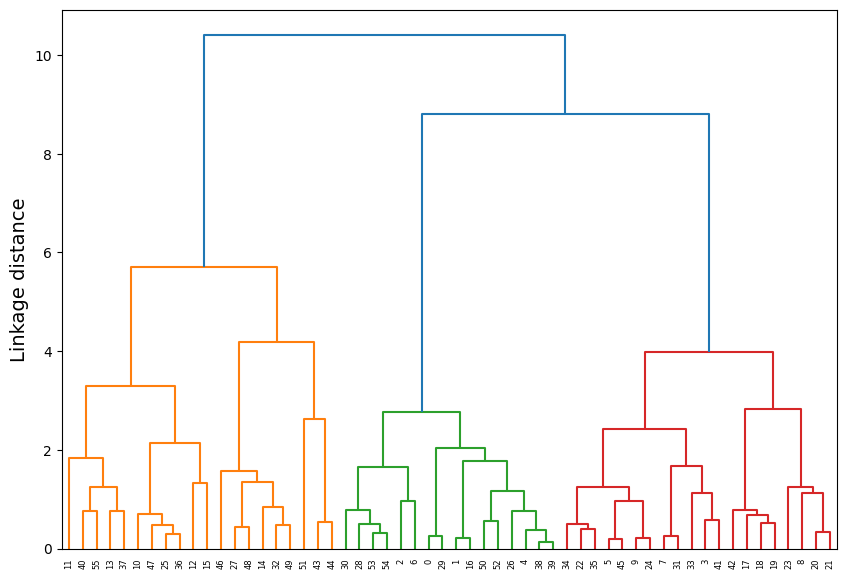

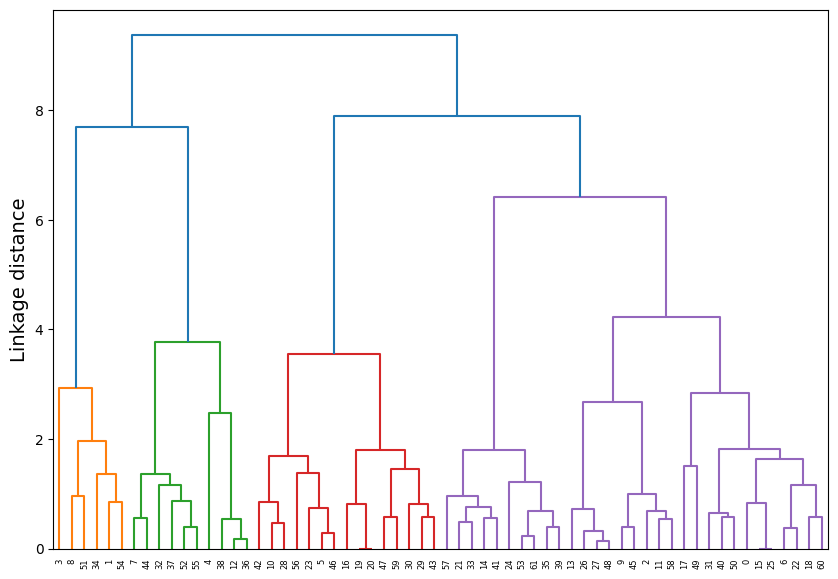

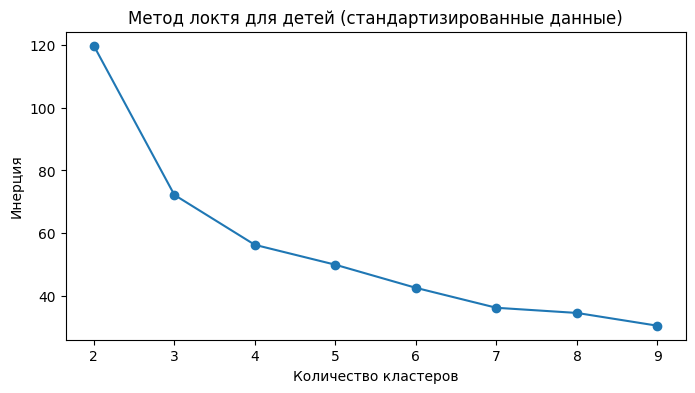

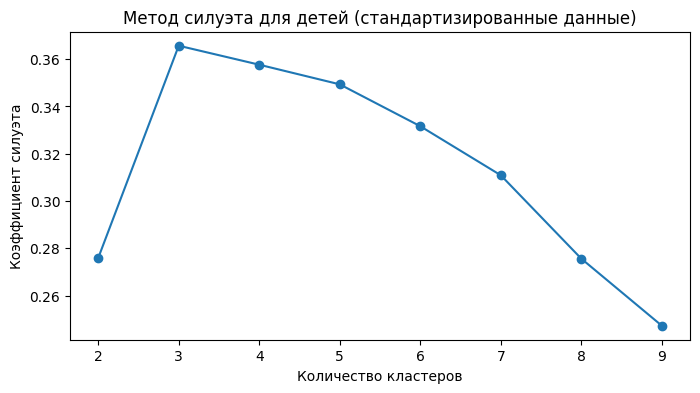

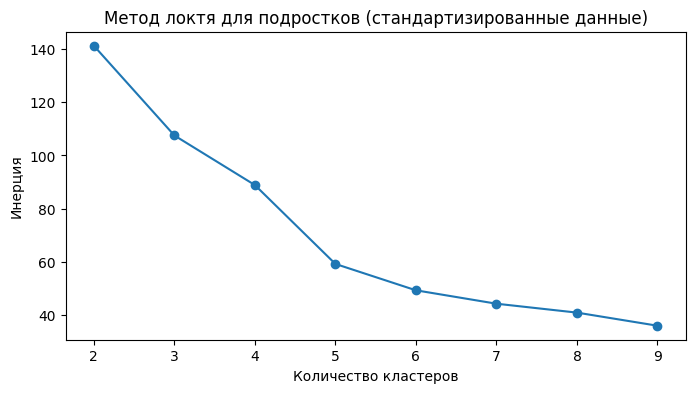

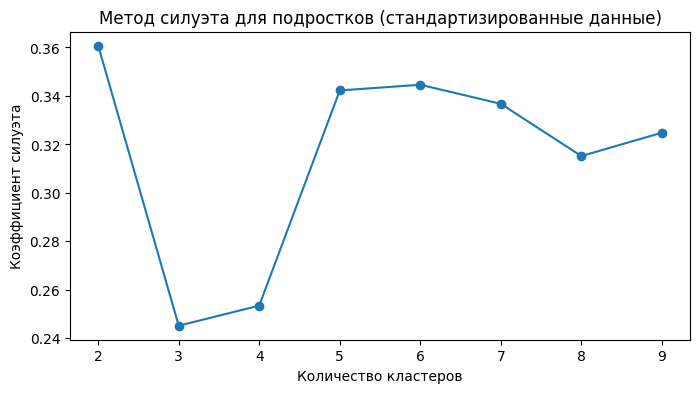

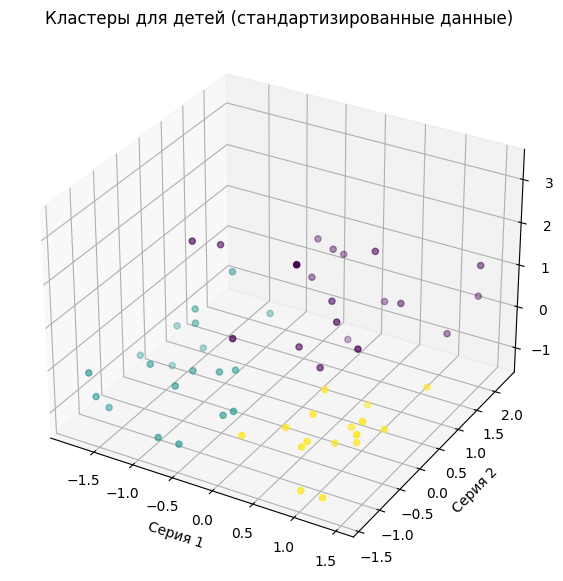

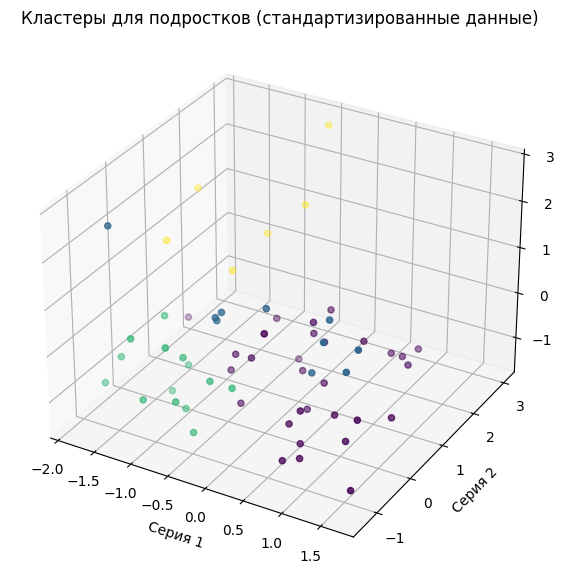

Participants in each cluster for children:
Cluster 0:
[11 12 13 14 15 16 26 28 33 37 38 41 44 45 47 48 49 50 52 56]
Cluster 1:
[ 4  6  8  9 10 18 19 20 21 22 23 24 25 32 34 35 36 42 43 46]
Cluster 2:
[ 1  2  3  5  7 17 27 29 30 31 39 40 51 53 54 55]

Participants in each cluster for adolescents:
Cluster 0:
[ 57  59  63  66  68  70  71  72  74  75  78  79  81  82  83  84  88  90
  92  96  97  98 102 105 106 107 110 114 115 117 118]
Cluster 1:
[ 61  64  69  89  93  94  95 101 109 112]
Cluster 2:
[ 62  67  73  76  77  80  85  86  87  99 100 103 104 113 116]
Cluster 3:
[ 58  60  65  91 108 111]
=== Children: Kruskal-Wallis Test for Each Series ===
Kruskal-Wallis test results for WMem: Количество объектов, серия 1 (Children): KruskalResult(statistic=38.913520806186135, pvalue=3.5484306447855487e-09)

Raw p-values for pairwise comparisons (Children - WMem: Количество объектов, серия 1):
Comparison: Cluster 2 vs Cluster 1 - WMem: Количество объектов, серия 1: U = 320.0, p-value = 0.000 (Signi

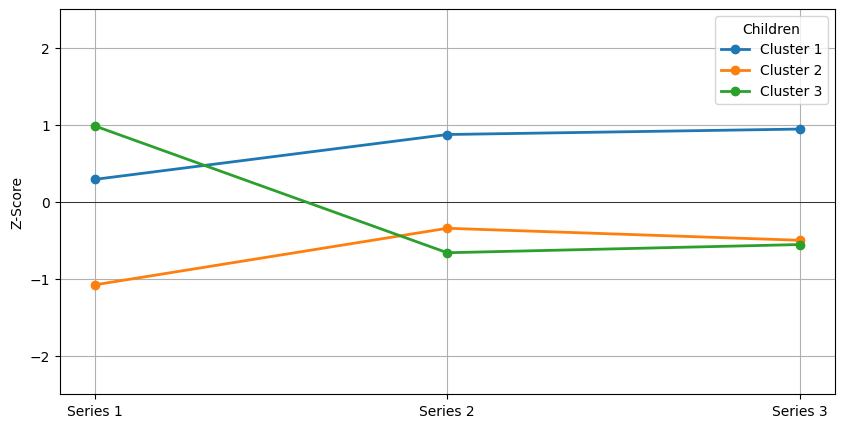


Z-Score Plot for Adolescents


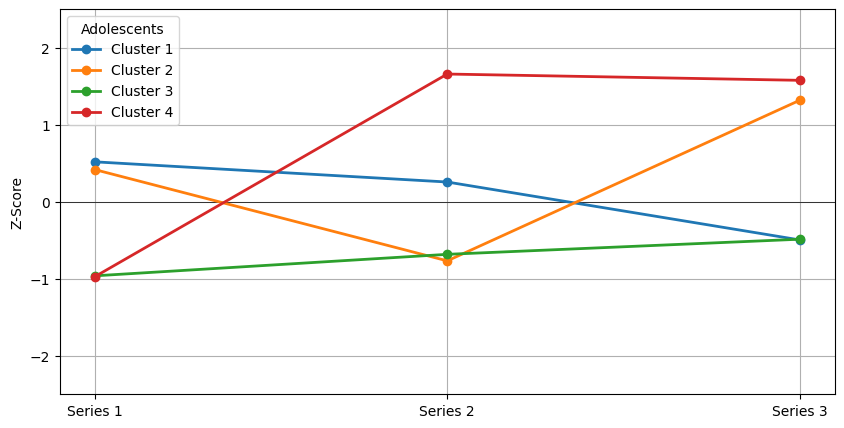

In [8]:
# Подключение к Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import kruskal, mannwhitneyu

# Загрузка данных
file_path = "/content/gdrive/My Drive/working_memory/child_adolesc.csv"
data = pd.read_csv(file_path)

# Разделение данных на две группы: дети (0) и подростки (1)
children_data = data[data['Ребенок(0)/Подросток(1)'] == 0]
adolescents_data = data[data['Ребенок(0)/Подросток(1)'] == 1]

# Извлечение данных для анализа
X_children = children_data[['WMem: Количество объектов, серия 1',
                            'WMem: Количество объектов, серия 2',
                            'WMem: Количество объектов, серия 3']].values

X_adolescents = adolescents_data[['WMem: Количество объектов, серия 1',
                                  'WMem: Количество объектов, серия 2',
                                  'WMem: Количество объектов, серия 3']].values

# Стандартизация данных для детей
scaler = StandardScaler()
X_children_scaled = scaler.fit_transform(X_children)

# Стандартизация данных для подростков
X_adolescents_scaled = scaler.fit_transform(X_adolescents)

# Построение дендрограммы для детей
plt.figure(figsize=(10, 7))
plt.ylabel("Linkage distance", fontsize=14)
#plt.title("Дендрограмма для детей (стандартизированные данные)")
dend = shc.dendrogram(shc.linkage(X_children_scaled, method='ward'))
plt.show()

# Построение дендрограммы для подростков
plt.figure(figsize=(10, 7))
plt.ylabel("Linkage distance", fontsize=14)
#plt.title("Дендрограмма для подростков (стандартизированные данные)")
dend = shc.dendrogram(shc.linkage(X_adolescents_scaled, method='ward'))
plt.show()

# Определение оптимального количества кластеров методом локтя для детей
inertia_children = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_children_scaled)
    inertia_children.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertia_children, marker='o')
plt.title("Метод локтя для детей (стандартизированные данные)")
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.show()

# Определение оптимального количества кластеров методом силуэта для детей
silhouette_scores_children = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_children_scaled)
    score = silhouette_score(X_children_scaled, kmeans.labels_)
    silhouette_scores_children.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores_children, marker='o')
plt.title("Метод силуэта для детей (стандартизированные данные)")
plt.xlabel("Количество кластеров")
plt.ylabel("Коэффициент силуэта")
plt.show()

# Оптимальное количество кластеров для детей
optimal_clusters_children = 3

# Определение оптимального количества кластеров методом локтя для подростков
inertia_adolescents = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_adolescents_scaled)
    inertia_adolescents.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertia_adolescents, marker='o')
plt.title("Метод локтя для подростков (стандартизированные данные)")
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.show()

# Определение оптимального количества кластеров методом силуэта для подростков
silhouette_scores_adolescents = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_adolescents_scaled)
    score = silhouette_score(X_adolescents_scaled, kmeans.labels_)
    silhouette_scores_adolescents.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores_adolescents, marker='o')
plt.title("Метод силуэта для подростков (стандартизированные данные)")
plt.xlabel("Количество кластеров")
plt.ylabel("Коэффициент силуэта")
plt.show()

# Оптимальное количество кластеров для подростков
optimal_clusters_adolescents = 4

# Иерархическая кластеризация для детей
agglo_children = AgglomerativeClustering(n_clusters=optimal_clusters_children, metric='euclidean', linkage='ward')
children_clusters = agglo_children.fit_predict(X_children_scaled)

# Иерархическая кластеризация для подростков
agglo_adolescents = AgglomerativeClustering(n_clusters=optimal_clusters_adolescents, metric='euclidean', linkage='ward')
adolescents_clusters = agglo_adolescents.fit_predict(X_adolescents_scaled)

# Визуализация кластеров для детей в 3D с использованием Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=X_children_scaled[:, 0],
    y=X_children_scaled[:, 1],
    z=X_children_scaled[:, 2],
    mode='markers',
    marker=dict(
        size=8,
        color=children_clusters,
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(title="Кластеры для детей (стандартизированные данные)", scene=dict(
    xaxis_title='Серия 1',
    yaxis_title='Серия 2',
    zaxis_title='Серия 3'
))
fig.show()

# Визуализация кластеров для подростков в 3D с использованием Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=X_adolescents_scaled[:, 0],
    y=X_adolescents_scaled[:, 1],
    z=X_adolescents_scaled[:, 2],
    mode='markers',
    marker=dict(
        size=8,
        color=adolescents_clusters,
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(title="Кластеры для подростков (стандартизированные данные)", scene=dict(
    xaxis_title='Серия 1',
    yaxis_title='Серия 2',
    zaxis_title='Серия 3'
))
fig.show()

# Визуализация кластеров для детей в 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_children_scaled[:, 0], X_children_scaled[:, 1], X_children_scaled[:, 2], c=children_clusters, cmap='viridis')
ax.set_title("Кластеры для детей (стандартизированные данные)")
ax.set_xlabel('Серия 1')
ax.set_ylabel('Серия 2')
ax.set_zlabel('Серия 3')
plt.show()

# Визуализация кластеров для подростков в 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_adolescents_scaled[:, 0], X_adolescents_scaled[:, 1], X_adolescents_scaled[:, 2], c=adolescents_clusters, cmap='viridis')
ax.set_title("Кластеры для подростков (стандартизированные данные)")
ax.set_xlabel('Серия 1')
ax.set_ylabel('Серия 2')
ax.set_zlabel('Серия 3')
plt.show()

# Дополнительный код для выполнения задач

# Добавление номеров участников в таблицы
children_data = children_data.copy()
adolescents_data = adolescents_data.copy()

children_data.loc[:, 'Cluster'] = children_clusters
adolescents_data.loc[:, 'Cluster'] = adolescents_clusters

# Вывод номеров участников в каждом кластере
print("Participants in each cluster for children:")
for i in range(optimal_clusters_children):
    print(f"Cluster {i}:")
    print(children_data.loc[children_data['Cluster'] == i].iloc[:, 0].values)

print("\nParticipants in each cluster for adolescents:")
for i in range(optimal_clusters_adolescents):
    print(f"Cluster {i}:")
    print(adolescents_data.loc[adolescents_data['Cluster'] == i].iloc[:, 0].values)


# Выполнение Kruskal-Wallis теста и парных сравнений для детей
print("=== Children: Kruskal-Wallis Test for Each Series ===")
for column in ['WMem: Количество объектов, серия 1', 'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3']:
    kruskal_results_children = kruskal(
        children_data[children_data['Cluster'] == 0][column],
        children_data[children_data['Cluster'] == 1][column],
        children_data[children_data['Cluster'] == 2][column]
    )
    print(f"Kruskal-Wallis test results for {column} (Children): {kruskal_results_children}")

    # Выполнение парных сравнений, если Kruskal-Wallis показывает значимость
    if kruskal_results_children.pvalue < 0.05:
        p_values_children = []
        clusters_children = children_data['Cluster'].unique()
        for i in range(len(clusters_children)):
            for j in range(i + 1, len(clusters_children)):
                u_stat, p_val = mannwhitneyu(
                    children_data[children_data['Cluster'] == clusters_children[i]][column],
                    children_data[children_data['Cluster'] == clusters_children[j]][column]
                )
                p_values_children.append((f"Comparison: Cluster {clusters_children[i]} vs Cluster {clusters_children[j]} - {column}", u_stat, p_val))

        # Печать результатов парных сравнений для детей
        print(f"\nRaw p-values for pairwise comparisons (Children - {column}):")
        for comparison, u_stat, p_value in p_values_children:
            significance = "Significant" if p_value < 0.05 else "Not Significant"
            print(f"{comparison}: U = {u_stat:.1f}, p-value = {p_value:.3f} ({significance})")

# Выполнение Kruskal-Wallis теста и парных сравнений для подростков
print("\n=== Adolescents: Kruskal-Wallis Test for Each Series ===")
for column in ['WMem: Количество объектов, серия 1', 'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3']:
    kruskal_results_adolescents = kruskal(
        adolescents_data[adolescents_data['Cluster'] == 0][column],
        adolescents_data[adolescents_data['Cluster'] == 1][column],
        adolescents_data[adolescents_data['Cluster'] == 2][column],
        adolescents_data[adolescents_data['Cluster'] == 3][column]
    )
    print(f"Kruskal-Wallis test results for {column} (Adolescents): {kruskal_results_adolescents}")

    # Выполнение парных сравнений, если Kruskal-Wallis показывает значимость
    if kruskal_results_adolescents.pvalue < 0.05:
        p_values_adolescents = []
        clusters_adolescents = adolescents_data['Cluster'].unique()
        for i in range(len(clusters_adolescents)):
            for j in range(i + 1, len(clusters_adolescents)):
                u_stat, p_val = mannwhitneyu(
                    adolescents_data[adolescents_data['Cluster'] == clusters_adolescents[i]][column],
                    adolescents_data[adolescents_data['Cluster'] == clusters_adolescents[j]][column]
                )
                p_values_adolescents.append((f"Comparison: Cluster {clusters_adolescents[i]} vs Cluster {clusters_adolescents[j]} - {column}", u_stat, p_val))

        # Печать результатов парных сравнений для подростков
        print(f"\nRaw p-values for pairwise comparisons (Adolescents - {column}):")
        for comparison, u_stat, p_value in p_values_adolescents:
            significance = "Significant" if p_value < 0.05 else "Not Significant"
            print(f"{comparison}: U = {u_stat:.1f}, p-value = {p_value:.3f} ({significance})")



# Функция для визуализации Z-Score данных с диапазоном от -3 до 3
def plot_standardized_scores(profiles, age_group, measures):
    plt.figure(figsize=(10, 5))

    for profile_name, profile_data in profiles.items():
        mean_scores = np.mean(profile_data, axis=0)
        #std_devs = np.std(profile_data, axis=0) ,yerr=std_devs
        plt.errorbar(measures, mean_scores, label=profile_name, fmt='o-', capsize=5, linewidth=2)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.ylim(-2.5, 2.5)  # Ограничение диапазона оси Y от -3 до 3
    #plt.xlabel('Measures')
    plt.ylabel('Z-Score')
    plt.grid(True)
    plt.legend(title=age_group)
    plt.show()


# Подготовка данных для построения графиков
measures = ['Series 1', 'Series 2', 'Series 3']

# Кластеры для детей и подростков
profiles_children = {
    'Cluster 1': X_children_scaled[children_clusters == 0],
    'Cluster 2': X_children_scaled[children_clusters == 1],
    'Cluster 3': X_children_scaled[children_clusters == 2]
}

profiles_adolescents = {
    'Cluster 1': X_adolescents_scaled[adolescents_clusters == 0],
    'Cluster 2': X_adolescents_scaled[adolescents_clusters == 1],
    'Cluster 3': X_adolescents_scaled[adolescents_clusters == 2],
    'Cluster 4': X_adolescents_scaled[adolescents_clusters == 3]
}

# Построение графиков Z-Score
print("\nZ-Score Plot for Children")
plot_standardized_scores(profiles_children, "Children", measures)

print("\nZ-Score Plot for Adolescents")
plot_standardized_scores(profiles_adolescents, "Adolescents", measures)

In [ ]:
# Функция для расчета размера эффекта
def compute_effect_size(U, n1, n2):
    return U / (n1 * n2)

# Создание DataFrame для хранения результатов Манна-Уитни
columns = ['Переменная', 'Children 0 - 1', 'Children 0 - 2', 'Children 1 - 2',
           'Adolescents 0 - 1', 'Adolescents 0 - 2', 'Adolescents 0 - 3',
           'Adolescents 1 - 2', 'Adolescents 1 - 3', 'Adolescents 2 - 3']
results_df = pd.DataFrame(columns=columns)

# Сравнение для детей и сохранение результатов
for column in ['WMem: Количество объектов, серия 1', 'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3']:
    row = [column]

    # Сравнение кластеров детей
    for i, j in [(0, 1), (0, 2), (1, 2)]:
        group1 = children_data[children_data['Cluster'] == i][column]
        group2 = children_data[children_data['Cluster'] == j][column]
        u_stat, p_val = mannwhitneyu(group1, group2)

        # Размер эффекта
        r_val = compute_effect_size(u_stat, len(group1), len(group2))
        row.append(f"U = {u_stat:.2f}, p = {p_val:.3f}, r = {r_val:.3f}")

    # Сравнение кластеров подростков
    for i, j in [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]:
        group1 = adolescents_data[adolescents_data['Cluster'] == i][column]
        group2 = adolescents_data[adolescents_data['Cluster'] == j][column]
        u_stat, p_val = mannwhitneyu(group1, group2)

        # Размер эффекта
        r_val = compute_effect_size(u_stat, len(group1), len(group2))
        row.append(f"U = {u_stat:.2f}, p = {p_val:.3f}, r = {r_val:.3f}")

    # Добавление строки в DataFrame
    results_df.loc[len(results_df)] = row

# Сохранение результатов в CSV файл
file_name = "/content/gdrive/My Drive/working_memory/mann_whitney_results_with_effect_size.csv"
results_df.to_csv(file_name, index=False)

print(f"Results saved to {file_name}")


Results saved to /content/gdrive/My Drive/working_memory/mann_whitney_results_with_effect_size.csv


In [ ]:
# Функция для расчета размера эффекта
def compute_effect_size(U, n1, n2):
    return U / (n1 * n2)

# Добавление кластеров в DataFrame
children_data['Cluster'] = children_clusters
adolescents_data['Cluster'] = adolescents_clusters


# Создание DataFrame для хранения результатов Манна-Уитни
columns = ['Переменная', 'Children 0 - 1', 'Children 0 - 2', 'Children 1 - 2',
           'Adolescents 0 - 1', 'Adolescents 0 - 2', 'Adolescents 0 - 3',
           'Adolescents 1 - 2', 'Adolescents 1 - 3', 'Adolescents 2 - 3']
results_df = pd.DataFrame(columns=columns)

# Количество сравнений для поправки Бонферрони
children_comparisons = 3  # Сравнения между кластерами 0, 1 и 2
adolescents_comparisons = 6  # Сравнения между кластерами 0, 1, 2 и 3

# Сравнение для детей и сохранение результатов
for column in ['WMem: Количество объектов, серия 1', 'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3']:
    row = [column]

    # Сравнение кластеров детей
    for i, j in [(0, 1), (0, 2), (1, 2)]:
        group1 = children_data[children_data['Cluster'] == i][column]
        group2 = children_data[children_data['Cluster'] == j][column]
        u_stat, p_val = mannwhitneyu(group1, group2)

        # Поправка Бонферрони
        p_val_adj = min(p_val * children_comparisons, 1.0)

        # Размер эффекта
        r_val = compute_effect_size(u_stat, len(group1), len(group2))
        row.append(f"U = {u_stat:.2f}, p = {p_val_adj:.3f}, r = {r_val:.3f}")

    # Сравнение кластеров подростков
    for i, j in [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]:
        group1 = adolescents_data[adolescents_data['Cluster'] == i][column]
        group2 = adolescents_data[adolescents_data['Cluster'] == j][column]
        u_stat, p_val = mannwhitneyu(group1, group2)

        # Поправка Бонферрони
        p_val_adj = min(p_val * adolescents_comparisons, 1.0)

        # Размер эффекта
        r_val = compute_effect_size(u_stat, len(group1), len(group2))
        row.append(f"U = {u_stat:.2f}, p = {p_val_adj:.3f}, r = {r_val:.3f}")

    # Добавление строки в DataFrame
    results_df.loc[len(results_df)] = row

# Сохранение результатов в CSV файл
file_name = "/content/gdrive/My Drive/working_memory/mann_whitney_results_with_bonferroni.csv"
results_df.to_csv(file_name, index=False)

print(f"Results saved to {file_name}")


<ipython-input-20-2ebb27df9f67>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Results saved to /content/gdrive/My Drive/working_memory/mann_whitney_results_with_bonferroni.csv


In [ ]:
# Подключение к Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import kruskal, mannwhitneyu

# Загрузка данных
file_path = "/content/gdrive/My Drive/working_memory/child_adolesc.csv"
data = pd.read_csv(file_path)

# Разделение данных на две группы: дети (0) и подростки (1)
children_data = data[data['Ребенок(0)/Подросток(1)'] == 0]
adolescents_data = data[data['Ребенок(0)/Подросток(1)'] == 1]

# Извлечение данных для анализа
X_children = children_data[['WMem: Количество объектов, серия 1',
                            'WMem: Количество объектов, серия 2',
                            'WMem: Количество объектов, серия 3']]

X_adolescents = adolescents_data[['WMem: Количество объектов, серия 1',
                                  'WMem: Количество объектов, серия 2',
                                  'WMem: Количество объектов, серия 3']]

# Стандартизация данных для детей и подростков
scaler = StandardScaler()
X_children_scaled = scaler.fit_transform(X_children)
X_adolescents_scaled = scaler.fit_transform(X_adolescents)

# Кластеризация для детей и подростков
agglo_children = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
children_clusters = agglo_children.fit_predict(X_children_scaled)

agglo_adolescents = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
adolescents_clusters = agglo_adolescents.fit_predict(X_adolescents_scaled)

# Добавление кластеров в данные
children_data['Cluster'] = children_clusters
adolescents_data['Cluster'] = adolescents_clusters

# Функция для выполнения анализа
def analyze_clusters(data, group_name):
    kruskal_results = kruskal(
        *[data[data['Cluster'] == cluster][['WMem: Количество объектов, серия 1', 'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3']].values.flatten()
          for cluster in data['Cluster'].unique()]
    )

    results = []
    if kruskal_results.pvalue < 0.05:
        clusters = data['Cluster'].unique()
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                for column in ['WMem: Количество объектов, серия 1', 'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3']:
                    u_stat, p_val = mannwhitneyu(
                        data[data['Cluster'] == clusters[i]][column],
                        data[data['Cluster'] == clusters[j]][column]
                    )
                    # Добавление записи о сравнении
                    results.append({
                        'Group': group_name,
                        'Kruskal H': kruskal_results.statistic,
                        'Kruskal p-Value': kruskal_results.pvalue,
                        'Comparison': f'Cluster {clusters[i]} vs Cluster {clusters[j]}',
                        'Measure': column,
                        'U-Statistic': u_stat,
                        'p-Value': p_val,
                        'Significance': 'Significant' if p_val < 0.05 else 'Not Significant',
                        'Ranking': f'Cluster {clusters[i]} < Cluster {clusters[j]}' if data[data['Cluster'] == clusters[i]][column].mean() < data[data['Cluster'] == clusters[j]][column].mean() else f'Cluster {clusters[i]} > Cluster {clusters[j]}'
                    })

    return pd.DataFrame(results)

# Выполнение анализа для детей и подростков
children_results = analyze_clusters(children_data, 'Children')
adolescents_results = analyze_clusters(adolescents_data, 'Adolescents')

# Объединение результатов в одну таблицу
final_results = pd.concat([children_results, adolescents_results])

# Сохранение таблицы на Google Диск
output_path = '/content/gdrive/My Drive/working_memory/cluster_analysis_results_with_kruskal.csv'
final_results.to_csv(output_path, index=False)

print(f'The results have been saved to {output_path}')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-8-8aedd25779c3>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-8aedd25779c3>:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The results have been saved to /content/gdrive/My Drive/working_memory/cluster_analysis_results_with_kruskal.csv


In [ ]:
# Функция для вычисления среднего и стандартного отклонения для каждой переменной Z-Score
def calculate_mean_std_zscore(data, cluster_column, variables):
    summary = {}
    clusters = data[cluster_column].unique()

    for var in variables:
        mean_std_by_cluster = []
        for cluster in clusters:
            cluster_data = data[data[cluster_column] == cluster][var]
            mean = np.mean(cluster_data)
            std = np.std(cluster_data)
            mean_std_by_cluster.append(f"{mean:.2f} ± {std:.2f}")
        summary[var] = mean_std_by_cluster

    return pd.DataFrame(summary, index=[f"Cluster {i}" for i in clusters])

# Преобразование данных детей и подростков в Z-Score
zscore_children_data = pd.DataFrame(X_children_scaled, columns=['WMem: Количество объектов, серия 1', 'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3'])
zscore_children_data['Cluster'] = children_clusters

zscore_adolescents_data = pd.DataFrame(X_adolescents_scaled, columns=['WMem: Количество объектов, серия 1', 'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3'])
zscore_adolescents_data['Cluster'] = adolescents_clusters

# Определение переменных для расчета
variables_zscore = ['WMem: Количество объектов, серия 1', 'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3']

# Вычисление Z-Score среднего и стандартного отклонения для детей
children_zscore_summary = calculate_mean_std_zscore(zscore_children_data, 'Cluster', variables_zscore)

# Вычисление Z-Score среднего и стандартного отклонения для подростков
adolescents_zscore_summary = calculate_mean_std_zscore(zscore_adolescents_data, 'Cluster', variables_zscore)

# Объединение данных в одну таблицу
combined_zscore_summary = pd.concat([children_zscore_summary, adolescents_zscore_summary], keys=['Children', 'Adolescents'])

# Сохранение таблицы Z-Score в Google Drive
file_path_zscore = '/content/gdrive/My Drive/working_memory/cluster_summary_zscore.csv'
combined_zscore_summary.to_csv(file_path_zscore)

print(f"Таблица Z-Score сохранена в {file_path_zscore}")


Таблица Z-Score сохранена в /content/gdrive/My Drive/working_memory/cluster_summary_zscore.csv


In [ ]:
# Сохраняем данные с новой колонкой "Кластер" для детей и подростков
output_file_path_children = "/content/gdrive/My Drive/working_memory/children_clusters.csv"
output_file_path_adolescents = "/content/gdrive/My Drive/working_memory/adolescents_clusters.csv"

# Сохранение данных для детей
children_data.to_csv(output_file_path_children, index=False, encoding='utf-8-sig')

# Сохранение данных для подростков
adolescents_data.to_csv(output_file_path_adolescents, index=False, encoding='utf-8-sig')

print(f"Файл с кластерами для детей сохранен: {output_file_path_children}")
print(f"Файл с кластерами для подростков сохранен: {output_file_path_adolescents}")


Файл с кластерами для детей сохранен: /content/gdrive/My Drive/working_memory/children_clusters.csv
Файл с кластерами для подростков сохранен: /content/gdrive/My Drive/working_memory/adolescents_clusters.csv


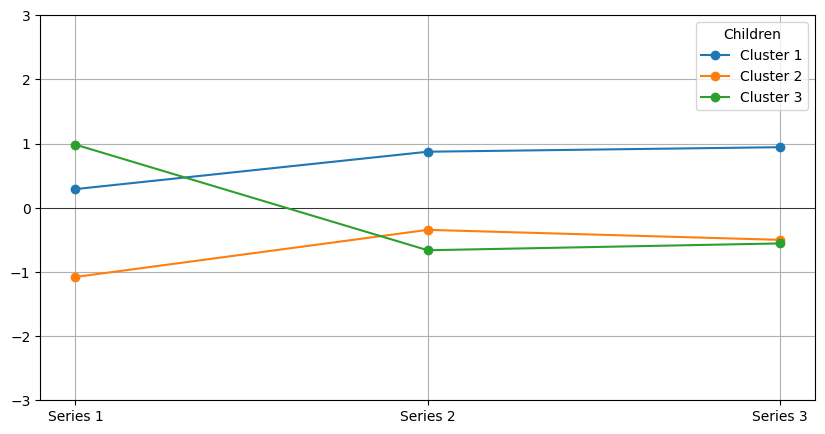

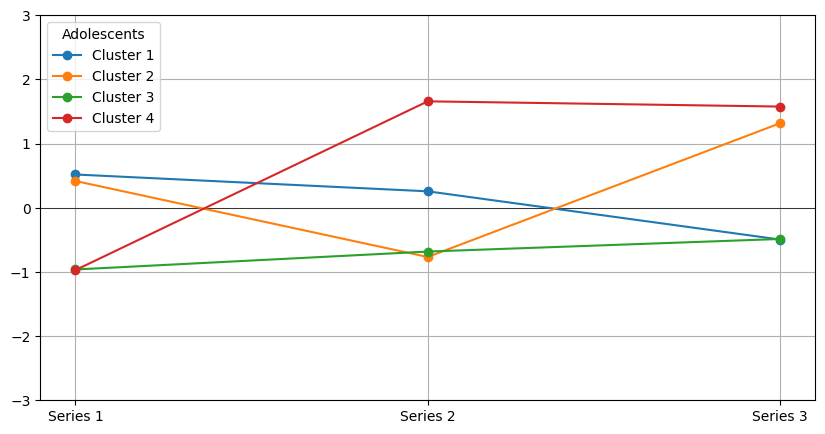

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Загрузка данных
file_path = "/content/gdrive/My Drive/working_memory/child_adolesc.csv"
data = pd.read_csv(file_path)

# Разделение данных на две группы: дети (0) и подростки (1)
children_data = data[data['Ребенок(0)/Подросток(1)'] == 0]
adolescents_data = data[data['Ребенок(0)/Подросток(1)'] == 1]

# Извлечение данных для анализа
series_columns = ['WMem: Количество объектов, серия 1',
                  'WMem: Количество объектов, серия 2',
                  'WMem: Количество объектов, серия 3']

X_children = children_data[series_columns].values
X_adolescents = adolescents_data[series_columns].values

# Стандартизация данных с помощью StandardScaler
scaler = StandardScaler()
X_children_scaled = scaler.fit_transform(X_children)
X_adolescents_scaled = scaler.fit_transform(X_adolescents)

# Выполним кластеризацию
optimal_clusters_children = 3
optimal_clusters_adolescents = 4

agglo_children = AgglomerativeClustering(n_clusters=optimal_clusters_children, metric='euclidean', linkage='ward')
children_clusters = agglo_children.fit_predict(X_children_scaled)

agglo_adolescents = AgglomerativeClustering(n_clusters=optimal_clusters_adolescents, metric='euclidean', linkage='ward')
adolescents_clusters = agglo_adolescents.fit_predict(X_adolescents_scaled)

# Создание профилей кластеров для графиков
profiles_children = {
    'Cluster 1': X_children_scaled[children_clusters == 0],
    'Cluster 2': X_children_scaled[children_clusters == 1],
    'Cluster 3': X_children_scaled[children_clusters == 2]
}

profiles_adolescents = {
    'Cluster 1': X_adolescents_scaled[adolescents_clusters == 0],
    'Cluster 2': X_adolescents_scaled[adolescents_clusters == 1],
    'Cluster 3': X_adolescents_scaled[adolescents_clusters == 2],
    'Cluster 4': X_adolescents_scaled[adolescents_clusters == 3]
}

# Функция для построения графиков
def plot_standardized_scores(profiles, age_group, measures):
    plt.figure(figsize=(10, 5))

    for profile_name, profile_data in profiles.items():
        if len(profile_data) > 0:  # Проверка на пустые данные
            mean_scores = np.mean(profile_data, axis=0)
            plt.errorbar(measures, mean_scores, label=profile_name, fmt='o-', capsize=5)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.ylim(-3, 3)  # Ограничение диапазона оси Y от -3 до 3
    #plt.xlabel()
    #plt.ylabel()
    plt.grid(True)
    plt.legend(title=age_group)
    plt.show()

# Подготовка данных для построения графиков
measures = ['Series 1', 'Series 2', 'Series 3']

# Построение графиков для детей на основе StandardScaler
print()
plot_standardized_scores(profiles_children, "Children", measures)

# Построение графиков для подростков на основе StandardScaler
print()
plot_standardized_scores(profiles_adolescents, "Adolescents", measures)



Plot for Children (Raw Data)


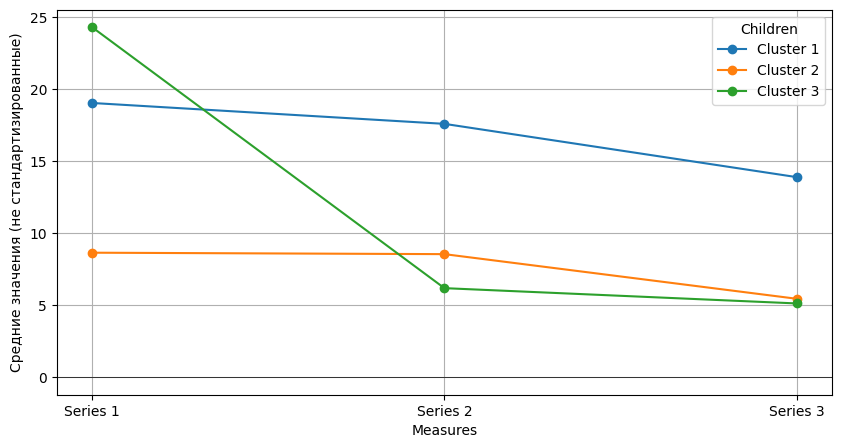

In [ ]:
# Построение графиков с исходными средними значениями (не стандартизированными)
def plot_raw_scores(profiles, age_group, measures):
    plt.figure(figsize=(10, 5))

    for profile_name, profile_data in profiles.items():
        mean_scores = np.mean(profile_data, axis=0)
        plt.errorbar(measures, mean_scores, label=profile_name, fmt='o-', capsize=5)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.xlabel('Measures')
    plt.ylabel('Средние значения (не стандартизированные)')
    plt.grid(True)
    plt.legend(title=age_group)
    plt.show()

# Создание профилей кластеров для исходных данных
profiles_children_raw = {
    'Cluster 1': X_children[children_clusters == 0],
    'Cluster 2': X_children[children_clusters == 1],
    'Cluster 3': X_children[children_clusters == 2]
}

# Построение графиков для детей с исходными данными
print("\nPlot for Children (Raw Data)")
plot_raw_scores(profiles_children_raw, "Children", measures)



Plot for Adolescents (Raw Data)


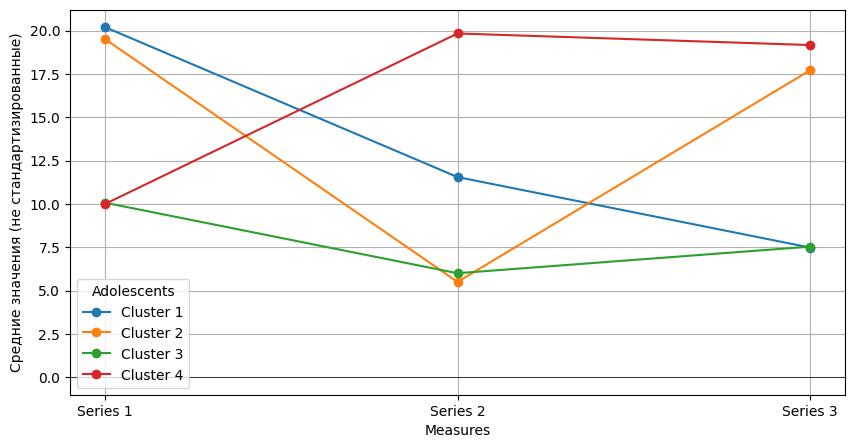

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Загрузка данных
file_path = "/content/gdrive/My Drive/working_memory/child_adolesc.csv"  # Укажи правильный путь к файлу
data = pd.read_csv(file_path)

# Разделение данных на две группы: дети (0) и подростки (1)
adolescents_data = data[data['Ребенок(0)/Подросток(1)'] == 1]

# Извлечение данных для анализа
series_columns = ['WMem: Количество объектов, серия 1',
                  'WMem: Количество объектов, серия 2',
                  'WMem: Количество объектов, серия 3']

X_adolescents = adolescents_data[series_columns].values

# Стандартизация данных с помощью StandardScaler
scaler = StandardScaler()
X_adolescents_scaled = scaler.fit_transform(X_adolescents)

# Выполним кластеризацию
optimal_clusters_adolescents = 4

agglo_adolescents = AgglomerativeClustering(n_clusters=optimal_clusters_adolescents, metric='euclidean', linkage='ward')
adolescents_clusters = agglo_adolescents.fit_predict(X_adolescents_scaled)

# Построение графиков с исходными средними значениями (не стандартизированными) для подростков
def plot_raw_scores(profiles, age_group, measures):
    plt.figure(figsize=(10, 5))

    for profile_name, profile_data in profiles.items():
        mean_scores = np.mean(profile_data, axis=0)
        plt.errorbar(measures, mean_scores, label=profile_name, fmt='o-', capsize=5)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.xlabel('Measures')
    plt.ylabel('Средние значения (не стандартизированные)')
    plt.grid(True)
    plt.legend(title=age_group)
    plt.show()

# Создание профилей кластеров для исходных данных (подростки)
profiles_adolescents_raw = {
    'Cluster 1': X_adolescents[adolescents_clusters == 0],
    'Cluster 2': X_adolescents[adolescents_clusters == 1],
    'Cluster 3': X_adolescents[adolescents_clusters == 2],
    'Cluster 4': X_adolescents[adolescents_clusters == 3]
}

# Подготовка данных для построения графиков
measures = ['Series 1', 'Series 2', 'Series 3']

# Построение графиков для подростков с исходными данными
print("\nPlot for Adolescents (Raw Data)")
plot_raw_scores(profiles_adolescents_raw, "Adolescents", measures)


In [ ]:

# Форматирование функции для вывода в формате "7.22 ± 5.09"
def format_mean_std(mean, std):
    return f"{mean:.2f} ± {std:.2f}"

# Создание таблицы для пола и возраста с форматом
def create_gender_age_table(data):
    # Подсчет количества мужчин и женщин в каждом кластере
    male_count = data.groupby('Cluster')['Пол'].apply(lambda x: sum(x == 0))
    female_count = data.groupby('Cluster')['Пол'].apply(lambda x: sum(x == 1))
    total_count = male_count + female_count  # Сумма общего количества людей в каждом кластере

    # Подсчет среднего возраста и стандартного отклонения в каждом кластере
    age_mean = data.groupby('Cluster')['Возраст'].mean()
    age_std = data.groupby('Cluster')['Возраст'].std()

    # Форматирование процента мужчин и женщин
    male_percent = (male_count / total_count * 100).round(2)
    female_percent = (female_count / total_count * 100).round(2)

    # Форматирование результата для пола
    formatted_gender = male_count.astype(str) + " (" + male_percent.astype(str) + "%) / " + \
                       female_count.astype(str) + " (" + female_percent.astype(str) + "%)"

    # Форматирование результата для возраста
    formatted_age = age_mean.combine(age_std, format_mean_std)

    # Создание результирующей таблицы
    result_table = pd.DataFrame({
        'Пол (0%) / Пол (1%)': formatted_gender,
        'Возраст (M ± SD)': formatted_age
    })

    return result_table

# Функция для проведения парных тестов Манна-Уитни
def pairwise_mannwhitney(data, column):
    clusters = data['Cluster'].unique()
    pairwise_results = []
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            group1 = data[data['Cluster'] == clusters[i]][column]
            group2 = data[data['Cluster'] == clusters[j]][column]
            stat, p_value = mannwhitneyu(group1, group2)
            pairwise_results.append({
                'Cluster Comparison': f"{clusters[i]} vs {clusters[j]}",
                'U-statistic': stat,
                'p-value': p_value
            })
    return pd.DataFrame(pairwise_results)

# Создание таблиц для детей и подростков
children_gender_age_table = create_gender_age_table(children_data)
adolescents_gender_age_table = create_gender_age_table(adolescents_data)

# Сохранение таблиц в CSV
children_gender_age_table.to_csv('/content/gdrive/My Drive/working_memory/children_gender_age_formatted.csv')
adolescents_gender_age_table.to_csv('/content/gdrive/My Drive/working_memory/adolescents_gender_age_formatted.csv')

# Хи-квадрат анализ для пола
def chi_square_test_gender(data):
    contingency_table = pd.crosstab(data['Cluster'], data['Пол'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Хи-квадрат тест для детей
chi2_children, p_children = chi_square_test_gender(children_data)
# Хи-квадрат тест для подростков
chi2_adolescents, p_adolescents = chi_square_test_gender(adolescents_data)

# Крускелл-Уоллис тест для возраста
def kruskal_wallis_test_age(data):
    clusters = data['Cluster'].unique()
    samples = [data[data['Cluster'] == cluster]['Возраст'] for cluster in clusters]
    stat, p_value = kruskal(*samples)
    return stat, p_value

# Крускелл-Уоллис тест для детей
kw_children_stat, kw_children_p = kruskal_wallis_test_age(children_data)
print(f"Kruskal-Wallis test for age (children): H = {kw_children_stat:.5f}, p-value = {kw_children_p:.5f}")

if kw_children_p <= 0.05:
    print("\nPerforming pairwise Mann-Whitney U tests for children (p <= 0.05):")
    children_pairwise_mw = pairwise_mannwhitney(children_data, 'Возраст')
    print(children_pairwise_mw)

# Крускелл-Уоллис тест для подростков
kw_adolescents_stat, kw_adolescents_p = kruskal_wallis_test_age(adolescents_data)
print(f"Kruskal-Wallis test for age (adolescents): H = {kw_adolescents_stat:.5f}, p-value = {kw_adolescents_p:.5f}")

if kw_adolescents_p <= 0.05:
    print("\nPerforming pairwise Mann-Whitney U tests for adolescents (p <= 0.05):")
    adolescents_pairwise_mw = pairwise_mannwhitney(adolescents_data, 'Возраст')
    print(adolescents_pairwise_mw)

# Вывод результатов Хи-квадрат тестов
print(f"Chi-square test for gender (children): Chi2 = {chi2_children:.4f}, p-value = {p_children:.5f}")
print(f"Chi-square test for gender (adolescents): Chi2 = {chi2_adolescents:.4f}, p-value = {p_adolescents:.5f}")


Kruskal-Wallis test for age (children): H = 5.97190, p-value = 0.05049
Kruskal-Wallis test for age (adolescents): H = 0.85702, p-value = 0.83578
Chi-square test for gender (children): Chi2 = 1.7070, p-value = 0.42593
Chi-square test for gender (adolescents): Chi2 = 2.3050, p-value = 0.51156
